In [1]:
#importing necessary libraries 
import pandas as pd 
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly 
import plotly.graph_objects as go
import plotly.express as pe 
import plotly.offline as po
from plotly.offline import init_notebook_mode
import cufflinks as cf

In [2]:
from plotly.offline import iplot

In [3]:
import pandas_profiling as pp

In [4]:
cf.go_offline()

In [5]:
#loading dataset 
df=pd.read_csv("E:\\Python class\\Datasets\\EDA Datasets\\data3\\googleplaystore.csv")

Description of App Dataset columns

App : The name of the app

Category : The category of the app

Rating : The rating of the app in the Play Store

Reviews : The number of reviews of the app

Size : The size of the app

Install : The number of installs of the app

Type : The type of the app (Free/Paid)

The price of the app (0 if it is Free)

Content Rating :The appropiate target audience of the app

Genres: The genre of the app

Last Updated : The date when the app was last updated

Current Ver : The current version of the app

Android Ver : The minimum Android version required to run the app

In [6]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [7]:
#checking size of dataframe 
df.shape 

(10841, 13)

In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [9]:
df.isnull().sum() #Checking null values inside dataset 

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
#Checking any duplicates or not inside dataset 
df.duplicated().sum() # it has 483 duplicate records 

483

In [11]:
df.nunique() #it shows unique records in each columns

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [12]:
df.describe() # finding the descriptive stastics of daaset 

Rating
count  9367.000000
mean      4.193338
std       0.537431
min       1.000000
25%       4.000000
50%       4.300000
75%       4.500000
max      19.000000

In [13]:
df.info() # it describes about the datatype and null values present in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [14]:
df.memory_usage() # shows column wise memory usage 

Index               128
App               86728
Category          86728
Rating            86728
Reviews           86728
Size              86728
Installs          86728
Type              86728
Price             86728
Content Rating    86728
Genres            86728
Last Updated      86728
Current Ver       86728
Android Ver       86728
dtype: int64

Automated EDA using pandas profiling 

In [15]:
profile=pp.ProfileReport(df,explorative=True)
profile.to_file("profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

From EDA it gets clear idea 
categorical data -->App, Category,Reviews,Size,Installs,Type ,Price,Content      Rating,Generes,LastUpdated,CurrentVer,AndroidVer
Numrical data--->Rating 

# DROPPING DUPLICATE RECORDS 

In [16]:
df.drop_duplicates(inplace=True)

In [17]:
df['Size'].value_counts()
#Removing M and K from the dataset and converting all values into one unit i.e M

Varies with device    1526
11M                    188
12M                    186
13M                    186
14M                    182
                      ... 
430k                     1
429k                     1
200k                     1
460k                     1
619k                     1
Name: Size, Length: 462, dtype: int64

In [18]:
# clean the 'Size' data and change the type 'object' to 'float'

# found value with '1,000+' in one of record, remove it from data_frame as uncertain whether it is 'M' or 'k'
index = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=index)


In [19]:
sizes=[i for i in df['Size']]
def clean_sizes(sizes_list):
    """
    As sizes are represented in 'M' and 'k', we remove 'M'
    and convert 'k'/kilobytes into megabytes
    """
    cleaned_data = []
    for size in sizes_list:
        if 'M' in size:
            size = size.replace('M', '')
            size = float(size)
        elif 'k' in size:
            size = size.replace('k', '')
            size = float(size)
            size = size/1024  # 1 megabyte = 1024 kilobytes
        # representing 'Varies with device' with value 0
        elif 'Varies with device' in size:
            size = float(0)
        cleaned_data.append(size)
    return cleaned_data

In [20]:
df['Size']=clean_sizes(sizes)

In [21]:
df['Size'] = df['Size'].astype(float)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [23]:
#Cleaning data of Price 
df['Price'].unique()
prices=[i for i in df['Price']]

In [24]:
def clean_prices(price_list):
    """
    As Price are represented by $ 
    we have to remove it 
    """
    cleaned_data = []
    for price in price_list:
        if '$' in price:
            price=price.replace("$",'')
        cleaned_data.append(price)
    return cleaned_data

In [25]:
df['Price']=clean_prices(prices)

In [26]:
df['Price']=df['Price'].astype(float)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(3), object(10)
memory usage: 1.1+ MB


In [28]:
df['Installs'].value_counts()

1,000,000+        1488
10,000,000+       1132
100,000+          1129
10,000+           1033
1,000+             890
100+               710
5,000,000+         683
500,000+           517
50,000+            474
5,000+             469
10+                385
100,000,000+       369
500+               328
50,000,000+        272
50+                204
5+                  82
1+                  67
500,000,000+        61
1,000,000,000+      49
0+                  14
0                    1
Name: Installs, dtype: int64

In [29]:
installs=[i for i in df['Installs']]

In [30]:
def clean_Installs(install_list):
    """
    As Installs  are containing + symbol ,and ',' symbol 
    we have to remove it 
    """
    cleaned_data = []
    for install in install_list:
        if '+' in install:
            install=install.replace("+",'')
        if ',' in install:
            install=install.replace(',','')
        cleaned_data.append(install)
    return cleaned_data

In [31]:
df['Installs']=clean_Installs(installs)

In [32]:
df['Installs']=df['Installs'].astype(float)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  object 
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(4), object(9)
memory usage: 1.1+ MB


In [34]:
df['Reviews']=df['Reviews'].astype(float)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  float64
 4   Size            10357 non-null  float64
 5   Installs        10357 non-null  float64
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  float64
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.1+ MB


# HANDLING MISSING VALUE 

In [36]:
#graphically presenting Nulls in dataset
df.isnull().sum().iplot()

While replacing the NULL first check the data distribution using skewness
Mean() function can be used to replace null if the data distribution is symmetric
What Is Symmetrical Distribution?
A symmetrical distribution occurs when the values of variables appear at regular frequencies and often the mean, median, and mode all occur at the same point. If a line were drawn dissecting the middle of the graph, it would reveal two sides that mirror one other.

In [37]:
df.skew()
#Since Rating's skewness is -ve it means data distribution is not a symmetric one so we cannot use the mean method to fill the NULL

C:\Users\shree\AppData\Local\Temp/ipykernel_5876/1411782226.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Rating      -1.823517
Reviews     17.467335
Size         1.709465
Installs    10.126705
Price       23.324381
dtype: float64

In [38]:
df['Rating'].fillna(df['Rating'].median(),inplace=True) # We have filled missing values from rating using its median value 

In [39]:
df.isna().sum() # nwow  very less null values are present inside the dataset we can easily drop it .

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [40]:
df.dropna(inplace=True)

In [41]:
df.isnull().sum().iplot()

In [42]:
#Converting Last Updated object to datetime 

In [43]:
df['Updated_Date']=pd.to_datetime(df['Last Updated'])

In [44]:
df.drop(columns=['Last Updated'],axis=1,inplace=True)

In [45]:
df['Month']=df['Updated_Date'].dt.month

In [46]:
df['Day']=df['Updated_Date'].dt.day

In [47]:
df['Year']=df['Updated_Date'].dt.year

In [48]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0  19.0     10000.0  Free    0.0       Everyone   
1     967.0  14.0    500000.0  Free    0.0       Everyone   
2   87510.0   8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25.0  50000000.0  Free    0.0           Teen   
4     967.0   2.8    100000.0  Free    0.0       Everyone   

                      Genres         Current Ver   Android Ver Updated_Date  \
0               Art & Design               1.0.0  4.0.3 and up   2018-01-07   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up   2018-01-15   
2               Art & Design               1.2.4  4.0.3 and up   2018-08-01   
3               Art & Design  Varies with device    4.2 and up   2018-06-08   
4    Art & Design;Creativity                 1.1    4.4 and up   2018-06-20   

   Month  Day  Year  
0      1    7  2018  
1      1   15  2018  
2      8    1  2018  
3      6    8  2018  
4      6   20  2018

In [49]:
#Since we have transformed Last_Updated date to Updated date we can easily remove the column Last Updated 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  float64       
 4   Size            10346 non-null  float64       
 5   Installs        10346 non-null  float64       
 6   Type            10346 non-null  object        
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  object        
 9   Genres          10346 non-null  object        
 10  Current Ver     10346 non-null  object        
 11  Android Ver     10346 non-null  object        
 12  Updated_Date    10346 non-null  datetime64[ns]
 13  Month           10346 non-null  int64         
 14  Day             10346 non-null  int64         
 15  Ye

# OUTLIER DETECTION

In [51]:
df[['Rating']].iplot(kind='box')

In [52]:
#From above graph is clear rating lies between 4.1 to 4.5

# Outlier Removal 

In [53]:
Q1=df['Rating'].quantile(0.25)
Q2=df['Rating'].quantile(0.75)
IQR=Q2-Q1
lower_limit=Q1-IQR*1.5
upper_limit=Q2+IQR*1.5

In [54]:
df_new=df[(df['Rating']>lower_limit) & (df['Rating']<upper_limit)]

In [55]:
df_new['Rating'].iplot(kind='hist',bins=50)

In [56]:
#from above representation it clear most of the rating lies betweeen 4.2 to 4..6

# UNIVARIATE ANALYSIS

In [57]:
df.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0  19.0     10000.0  Free    0.0       Everyone   
1     967.0  14.0    500000.0  Free    0.0       Everyone   
2   87510.0   8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25.0  50000000.0  Free    0.0           Teen   
4     967.0   2.8    100000.0  Free    0.0       Everyone   

                      Genres         Current Ver   Android Ver Updated_Date  \
0               Art & Design               1.0.0  4.0.3 and up   2018-01-07   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up   2018-01-15   
2               Art & Design               1.2.4  4.0.3 and up   2018-08-01   
3               Art & Design  Varies with device    4.2 and up   2018-06-08   
4    Art & Design;Creativity                 1.1    4.4 and up   2018-06-20   

   Month  Day  Year  
0      1    7  2018  
1      1   15  2018  
2      8    1  2018  
3      6    8  2018  
4      6   20  2018

In [58]:
df_new=df

In [59]:
df_new['Price'].iplot(kind='scatter')

In [60]:
df_new['Reviews'].iplot()

In [61]:
#Following bar chart shows category wise no of app installed it shows category family has the maximum count
df_new['Category'].value_counts().iplot(kind='bar',xTitle='Apps Category',yTitle='Count of Apps',
                                       title='No of Apps As per Category',theme='solar')

In [62]:
import plotly.graph_objects as go

# BIVARIATE ANALYSIS

In [63]:
df_new.groupby('Category')['Rating'].mean().iplot(theme='solar',xTitle='Category',yTitle='Average Rating',
                                                 title='Category Wise Average Rating Distribution') #Following graph show the average rating distribution according to apps
#Graph shows Events has the maximum average rating 

In [64]:
df_new.groupby('Category')['Reviews'].mean().iplot(kind='scatter',
                                                  xTitle='Category',yTitle='Avg Reviews',
                                                  title='Category Wise Average Reviews',theme='solar')
#Following graph shows the average Reviews distribution according to respective category in the app 
#It shows Category Social has nearly 2M reviews 

In [65]:
df_new.groupby('Category')['Price'].mean().iplot(kind='scatter',
                                                xTitle='Category',yTitle='Average price',theme='solar',
                                                title='Category Wise Average Price Distribution')
#Following graph shows the average Price  distribution according to respective category in the app 
#It shows Category Financial  has maximum average price followed by LifeStyle 

In [66]:
#Plotting the relationship between Type of Apps and their respective prices 
df_new[['Price','Type']].iplot(theme='solar')

In [67]:
fig = pe.pie(df_new, values='Reviews', names=df_new['Content Rating'], title='Content Wise Average Reviews Distribution')
fig.show()
#Following graph shows the average Rating   distribution according to respective category Content in the app 
#It shows Category content Everyone + has  maximum average Reviews

In [68]:
fig = pe.pie(df_new, values='Rating', names=df_new['Content Rating'], title='Content Wise Average Ratings Distribution')
fig.show()
#Following graph shows the average Rating   distribution according to respective category Content in the app 
#It shows Category content Everyone + has  maximum average Reviews

In [69]:
df_new.groupby('Content Rating')['Installs'].mean().iplot(kind='bar',
                                                xTitle='Content Rating ',yTitle='Average Installs',title='Content Wise Average Installs Distribution')
#Following graph shows the average Rating   distribution according to respective category Content in the app 
#It shows Category content Everyone + has  maximum average installation followed by teen group

In [70]:
df_new.groupby('Type')['Price'].mean().iplot(kind='bar')

In [71]:
#Following graph show the average rating distribution to the apps as per Type they are mean free or paid version
df_new.groupby('Type')['Rating'].mean().iplot(kind='bar')
#Conclusion -->Graph shows that paid app has comparatively more average rating than free apps

In [72]:
#Following bar graph show the average distribution on app based on their availability aither they are free or paid
df_new.groupby('Type')['Reviews'].mean().iplot(kind='bar')
#From graph it clears that there is no effect on reviews either they are free or paid since free app has highest average reviews

In [73]:
df_new.groupby('Size')['Price'].mean().iplot(kind='scatter',width=2,xTitle='Size of Apps',yTitle='Price',title='Size of Apps Vs Price')
#Graph shows size of apps does not affect on their price 

In [74]:
#Now we will see the relationship between the category of app and average installation in each category 
df_new.groupby('Category')['Installs'].mean().iplot(kind='scatter',
                                                    xTitle='Category',
                                                   yTitle='Average Installs',title='Category wise Average Installation')

#Conclusion -->Communication category has maximum average install of apps

In [75]:
#Now we will see the relationship between the type of app and average installation in each category 
df_new.groupby('Type')['Installs'].mean().iplot(kind='bar',
                                                    xTitle='Type',
                                                   yTitle='Average Installs',title='Category wise Average Installation')

#From barchart it clears that fee apps hax maximum average installation

In [76]:
#Following graph shows year wise no of apps 
df_new.groupby('Year')['App'].count().iplot(kind='scatter',xTitle='Year',yTitle='count of App',title='Year Wise No of Apps')
#it shows year by year no of apps are countinuously increasing 

# MULTIVARIATE ANALYSIS

In [77]:
df_new.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0  19.0     10000.0  Free    0.0       Everyone   
1     967.0  14.0    500000.0  Free    0.0       Everyone   
2   87510.0   8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25.0  50000000.0  Free    0.0           Teen   
4     967.0   2.8    100000.0  Free    0.0       Everyone   

                      Genres         Current Ver   Android Ver Updated_Date  \
0               Art & Design               1.0.0  4.0.3 and up   2018-01-07   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up   2018-01-15   
2               Art & Design               1.2.4  4.0.3 and up   2018-08-01   
3               Art & Design  Varies with device    4.2 and up   2018-06-08   
4    Art & Design;Creativity                 1.1    4.4 and up   2018-06-20   

   Month  Day  Year  
0      1    7  2018  
1      1   15  2018  
2      8    1  2018  
3      6    8  2018  
4      6   20  2018

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver',
       'Updated_Date', 'Month', 'Day', 'Year'],
      dtype='object')

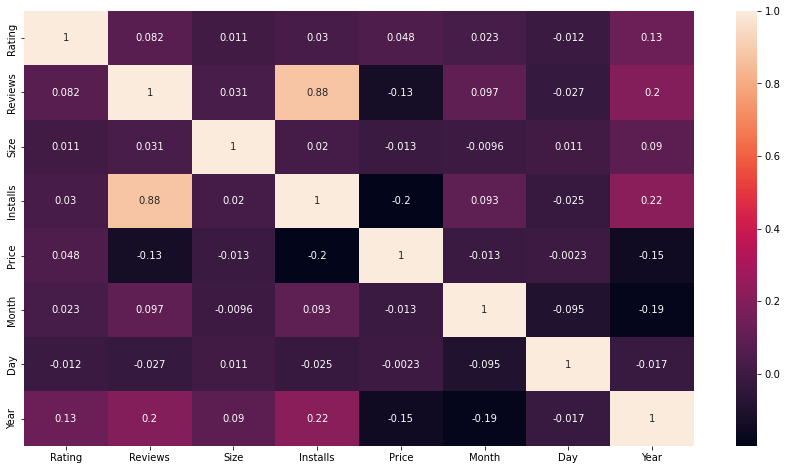

In [78]:
corr = df_new.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df_new.columns

In [79]:
#Highest correlation is between Installs and Reviews

In [80]:
app_df=df_new.groupby(['Category','Reviews','Size','Installs','Content Rating','Price','Type'])['Rating'].mean().reset_index()

In [81]:
app_df.head()

Category  Reviews  Size  Installs Content Rating  Price  Type  Rating
0  ART_AND_DESIGN      0.0   1.2       0.0       Everyone    0.0  Free     4.3
1  ART_AND_DESIGN      1.0   2.9     100.0       Everyone    0.0  Free     5.0
2  ART_AND_DESIGN      7.0   5.6    5000.0       Everyone    0.0  Free     4.3
3  ART_AND_DESIGN     13.0   4.5    1000.0       Everyone    0.0  Free     4.4
4  ART_AND_DESIGN     18.0   3.6    1000.0       Everyone    0.0  Free     4.0

In [82]:
pe.scatter(data_frame=app_df,x='Category',y='Rating',
           hover_data=['Reviews','Size','Installs'],
          size='Reviews',size_max=60)

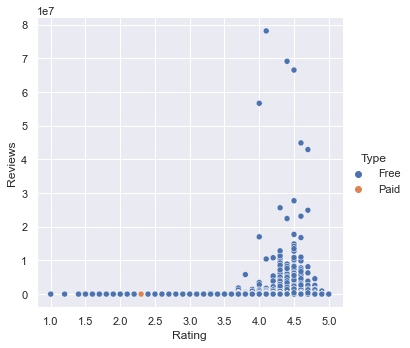

In [83]:
#Finding Relation of Rating and Reviews As per Category 
sns.set_theme(style='darkgrid')
sns.relplot(data=df_new,x='Rating',y='Reviews',hue='Type',)

In [84]:
plt.figure(figsize=(20,10))
sns.stripplot(data=app_df,x='Content Rating',y='Rating',hue='Type')

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

In [85]:
cat_content_type_rating_df=df_new.groupby(['Category','Content Rating','Type'])['Rating'].mean().reset_index()

In [86]:
#Grouping the data as per category ,content and iether they are paid or free
cat_content_type_rating_df.head()

Category Content Rating  Type    Rating
0     ART_AND_DESIGN       Everyone  Free  4.343860
1     ART_AND_DESIGN       Everyone  Paid  4.733333
2     ART_AND_DESIGN   Everyone 10+  Free  4.700000
3     ART_AND_DESIGN           Teen  Free  4.466667
4  AUTO_AND_VEHICLES       Everyone  Free  4.197500

In [87]:
#Finding relation of category and Rating as per their availability either it is free or paid 
pe.bar(data_frame=cat_content_type_rating_df,
       x='Category',y='Rating',color='Type',hover_data=['Content Rating'])
#from below graph it clears that Family Category with paid apps in Mature 17+ Content Category has highest rating among all the Category compared to free apps

In [88]:
#Grouping the dataset based on Category ,Content Rating ,Type based on average Reviews
cat_content_type_reviews_df=df_new.groupby(['Category','Content Rating','Type'])['Reviews'].mean().reset_index()
cat_content_type_reviews_df.head()

Category Content Rating  Type       Reviews
0     ART_AND_DESIGN       Everyone  Free  25327.964912
1     ART_AND_DESIGN       Everyone  Paid    722.000000
2     ART_AND_DESIGN   Everyone 10+  Free   7699.000000
3     ART_AND_DESIGN           Teen  Free  86942.000000
4  AUTO_AND_VEHICLES       Everyone  Free  11050.112500

In [89]:
#Finding the effects of free or paid version of app on each Category on the Reviews
pe.bar(data_frame=cat_content_type_reviews_df,
       x='Category',y='Reviews',color='Type',hover_data=['Content Rating'])

from above representation it clear Category Sicail under Content Rating Category Teen Free version apps has highest Reviews 

In [90]:
#Grouping the dataset based on Category ,Content Rating ,Type based on average Size of each Apps
cat_content_type_Size_df=df_new.groupby(['Category','Content Rating','Type'])[['Size','Rating']].mean().reset_index()
cat_content_type_Size_df.head()

Category Content Rating  Type       Size    Rating
0     ART_AND_DESIGN       Everyone  Free  12.198246  4.343860
1     ART_AND_DESIGN       Everyone  Paid   5.200000  4.733333
2     ART_AND_DESIGN   Everyone 10+  Free   4.200000  4.700000
3     ART_AND_DESIGN           Teen  Free  16.400000  4.466667
4  AUTO_AND_VEHICLES       Everyone  Free  18.123257  4.197500

In [91]:
#Finding the effects size of each Appp on Conent Rating ,Type under each Category of Apps
pe.bar(data_frame=cat_content_type_Size_df,
       x='Category',y='Rating',color='Type',hover_data=['Content Rating','Size'])

In [92]:
#It shows the size of app doesnot matter on the rating of apps

# FEATURE -ENGINEERING 

In [93]:
df_new.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0  19.0     10000.0  Free    0.0       Everyone   
1     967.0  14.0    500000.0  Free    0.0       Everyone   
2   87510.0   8.7   5000000.0  Free    0.0       Everyone   
3  215644.0  25.0  50000000.0  Free    0.0           Teen   
4     967.0   2.8    100000.0  Free    0.0       Everyone   

                      Genres         Current Ver   Android Ver Updated_Date  \
0               Art & Design               1.0.0  4.0.3 and up   2018-01-07   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up   2018-01-15   
2               Art & Design               1.2.4  4.0.3 and up   2018-08-01   
3               Art & Design  Varies with device    4.2 and up   2018-06-08   
4    Art & Design;Creativity                 1.1    4.4 and up   2018-06-20   

   Month  Day  Year  
0      1    7  2018  
1      1   15  2018  
2      8    1  2018  
3      6    8  2018  
4      6   20  2018

In [94]:
df['Type'].value_counts() #Since it contain only two unique values we can simply replace Free -->0 and Paid -->1


Free    9584
Paid     762
Name: Type, dtype: int64

In [95]:
df_new['Type']=pd.get_dummies(df_new['Type'],drop_first=True)

In [96]:
df_new.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price Content Rating  \
0     159.0  19.0     10000.0     0    0.0       Everyone   
1     967.0  14.0    500000.0     0    0.0       Everyone   
2   87510.0   8.7   5000000.0     0    0.0       Everyone   
3  215644.0  25.0  50000000.0     0    0.0           Teen   
4     967.0   2.8    100000.0     0    0.0       Everyone   

                      Genres         Current Ver   Android Ver Updated_Date  \
0               Art & Design               1.0.0  4.0.3 and up   2018-01-07   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up   2018-01-15   
2               Art & Design               1.2.4  4.0.3 and up   2018-08-01   
3               Art & Design  Varies with device    4.2 and up   2018-06-08   
4    Art & Design;Creativity                 1.1    4.4 and up   2018-06-20   

   Month  Day  Year  
0      1    7  2018  
1      1   15  2018  
2      8    1  2018  
3      6    8  2018  
4      6   20  2018

In [97]:
df_new['Type']=df_new['Type'].astype(int)

In [98]:
df_new['Content Rating'].value_counts()

Everyone           8372
Teen               1146
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [99]:
#Using Label encoding we will convert each content rating group into 
from sklearn.preprocessing import LabelEncoder

In [100]:
lable_encoder=LabelEncoder()
df_new['Content Rating']=lable_encoder.fit_transform(df_new['Content Rating'])
df_new['Content Rating'].unique()

array([1, 4, 2, 3, 0, 5])

In [101]:
df_new.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price  Content Rating  \
0     159.0  19.0     10000.0     0    0.0               1   
1     967.0  14.0    500000.0     0    0.0               1   
2   87510.0   8.7   5000000.0     0    0.0               1   
3  215644.0  25.0  50000000.0     0    0.0               4   
4     967.0   2.8    100000.0     0    0.0               1   

                      Genres         Current Ver   Android Ver Updated_Date  \
0               Art & Design               1.0.0  4.0.3 and up   2018-01-07   
1  Art & Design;Pretend Play               2.0.0  4.0.3 and up   2018-01-15   
2               Art & Design               1.2.4  4.0.3 and up   2018-08-01   
3               Art & Design  Varies with device    4.2 and up   2018-06-08   
4    Art & Design;Creativity                 1.1    4.4 and up   2018-06-20   

   Month  Day  Year  
0      1    7  2018  
1      1   15  2018  
2      8    1  2018  
3      6    8  2018  
4      6   20  2018

In [102]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  float64       
 4   Size            10346 non-null  float64       
 5   Installs        10346 non-null  float64       
 6   Type            10346 non-null  int32         
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  int32         
 9   Genres          10346 non-null  object        
 10  Current Ver     10346 non-null  object        
 11  Android Ver     10346 non-null  object        
 12  Updated_Date    10346 non-null  datetime64[ns]
 13  Month           10346 non-null  int64         
 14  Day             10346 non-null  int64         
 15  Ye

In [103]:
df_new['Genres'].value_counts()

Tools                                840
Entertainment                        587
Education                            526
Business                             427
Medical                              408
                                    ... 
Parenting;Brain Games                  1
Travel & Local;Action & Adventure      1
Lifestyle;Pretend Play                 1
Tools;Education                        1
Strategy;Creativity                    1
Name: Genres, Length: 119, dtype: int64

#Since the value_counts of Geners varies we will use frequency encoding

In [104]:
fq=(df_new.groupby('Genres')).size()/len(df_new)
fq

Genres
Action                                   0.034409
Action;Action & Adventure                0.001450
Adventure                                0.007249
Adventure;Action & Adventure             0.001257
Adventure;Brain Games                    0.000097
                                           ...   
Video Players & Editors                  0.016721
Video Players & Editors;Creativity       0.000193
Video Players & Editors;Music & Video    0.000290
Weather                                  0.007926
Word                                     0.002706
Length: 119, dtype: float64

In [105]:
df_new['Genres']=df_new['Genres'].map(fq)

In [106]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10346 non-null  object        
 1   Category        10346 non-null  object        
 2   Rating          10346 non-null  float64       
 3   Reviews         10346 non-null  float64       
 4   Size            10346 non-null  float64       
 5   Installs        10346 non-null  float64       
 6   Type            10346 non-null  int32         
 7   Price           10346 non-null  float64       
 8   Content Rating  10346 non-null  int32         
 9   Genres          10346 non-null  float64       
 10  Current Ver     10346 non-null  object        
 11  Android Ver     10346 non-null  object        
 12  Updated_Date    10346 non-null  datetime64[ns]
 13  Month           10346 non-null  int64         
 14  Day             10346 non-null  int64         
 15  Ye

In [107]:
df_new.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

    Reviews  Size    Installs  Type  Price  Content Rating    Genres  \
0     159.0  19.0     10000.0     0    0.0               1  0.005509   
1     967.0  14.0    500000.0     0    0.0               1  0.000193   
2   87510.0   8.7   5000000.0     0    0.0               1  0.005509   
3  215644.0  25.0  50000000.0     0    0.0               4  0.005509   
4     967.0   2.8    100000.0     0    0.0               1  0.000677   

          Current Ver   Android Ver Updated_Date  Month  Day  Year  
0               1.0.0  4.0.3 and up   2018-01-07      1    7  2018  
1               2.0.0  4.0.3 and up   2018-01-15      1   15  2018  
2               1.2.4  4.0.3 and up   2018-08-01      8    1  2018  
3  Varies with device    4.2 and up   2018-06-08      6    8  2018  
4                 1.1    4.4 and up   2018-06-20      6   20  2018

In [108]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [109]:
freq_map=df_new['Category'].value_counts().to_dict()

In [110]:
df_new['Category']=df_new['Category'].map(freq_map) #We are trying to replace its count values

In [111]:
df_new['Category']

0          64
1          64
2          64
3          64
4          64
         ... 
10836    1939
10837    1939
10838     408
10839     229
10840     373
Name: Category, Length: 10346, dtype: int64

In [112]:
df_new.head()

App  Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook        64     4.1   
1                                Coloring book moana        64     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...        64     4.7   
3                              Sketch - Draw & Paint        64     4.5   
4              Pixel Draw - Number Art Coloring Book        64     4.3   

    Reviews  Size    Installs  Type  Price  Content Rating    Genres  \
0     159.0  19.0     10000.0     0    0.0               1  0.005509   
1     967.0  14.0    500000.0     0    0.0               1  0.000193   
2   87510.0   8.7   5000000.0     0    0.0               1  0.005509   
3  215644.0  25.0  50000000.0     0    0.0               4  0.005509   
4     967.0   2.8    100000.0     0    0.0               1  0.000677   

          Current Ver   Android Ver Updated_Date  Month  Day  Year  
0               1.0.0  4.0.3 and up   2018-01-07      1    7  2018  
1               2.0.0  4.0.3 and up   2018-01-15      1   15  2018  
2               1.2.4  4.0.3 and up   2018-08-01      8    1  2018  
3  Varies with device    4.2 and up   2018-06-08      6    8  2018  
4                 1.1    4.4 and up   2018-06-20      6   20  2018

In [114]:
Android_Version=[i for i in df_new['Android Ver']]

['4.0.3 and up',
 '4.0.3 and up',
 '4.0.3 and up',
 '4.2 and up',
 '4.4 and up',
 '2.3 and up',
 '4.0.3 and up',
 '4.2 and up',
 '3.0 and up',
 '4.0.3 and up',
 '4.1 and up',
 '4.0 and up',
 '4.1 and up',
 '4.4 and up',
 '2.3 and up',
 '4.1 and up',
 '2.3 and up',
 '4.0.3 and up',
 '4.1 and up',
 '4.1 and up',
 '4.0.3 and up',
 '4.0.3 and up',
 '4.1 and up',
 '4.1 and up',
 '3.0 and up',
 '4.0.3 and up',
 '4.0.3 and up',
 '2.3 and up',
 '2.3 and up',
 '4.0.3 and up',
 '2.3 and up',
 '4.0 and up',
 '4.1 and up',
 '4.1 and up',
 '4.1 and up',
 '4.4 and up',
 '2.3.3 and up',
 '4.0.3 and up',
 '4.0 and up',
 '4.0.3 and up',
 '4.0.3 and up',
 'Varies with device',
 '4.1 and up',
 '4.1 and up',
 '4.1 and up',
 '4.1 and up',
 '4.1 and up',
 '2.3 and up',
 '4.0.3 and up',
 '4.1 and up',
 '4.1 and up',
 'Varies with device',
 '4.1 and up',
 '4.1 and up',
 '4.0 and up',
 '4.4 and up',
 '4.1 and up',
 '2.2 and up',
 '4.4 and up',
 '4.0.3 and up',
 '4.2 and up',
 '4.1 and up',
 '4.0 and up',
 '4.2

In [167]:
df_new['Android Ver']=df_new['Android Ver'].str.replace('Varies with device','0.0.0')

In [131]:
df_new['Android Ver']=df_new['Android Ver'].str.split(' ').str[0]

In [136]:
df_new['Android Ver']=df_new['Android Ver'].str.replace("''",'')

In [138]:
df_new['Android Ver']=df_new['Android Ver'].str.replace('W','')

In [172]:
df_new.head()

Category  Rating   Reviews  Size    Installs  Type  Price  Content Rating  \
0        64     4.1     159.0  19.0     10000.0     0    0.0               1   
1        64     3.9     967.0  14.0    500000.0     0    0.0               1   
2        64     4.7   87510.0   8.7   5000000.0     0    0.0               1   
3        64     4.5  215644.0  25.0  50000000.0     0    0.0               4   
4        64     4.3     967.0   2.8    100000.0     0    0.0               1   

     Genres         Current Ver Android Ver Updated_Date  Month  Day  Year  
0  0.005509               1.0.0       4.0.3   2018-01-07      1    7  2018  
1  0.000193               2.0.0       4.0.3   2018-01-15      1   15  2018  
2  0.005509               1.2.4       4.0.3   2018-08-01      8    1  2018  
3  0.005509  Varies with device         4.2   2018-06-08      6    8  2018  
4  0.000677                 1.1         4.4   2018-06-20      6   20  2018

In [170]:
#Since almost every value inside APP column is unique so we can easily drop if 
df_new.drop('App',axis=1,inplace=True)

In [174]:
df_new.head()

Category  Rating   Reviews  Size    Installs  Type  Price  Content Rating  \
0        64     4.1     159.0  19.0     10000.0     0    0.0               1   
1        64     3.9     967.0  14.0    500000.0     0    0.0               1   
2        64     4.7   87510.0   8.7   5000000.0     0    0.0               1   
3        64     4.5  215644.0  25.0  50000000.0     0    0.0               4   
4        64     4.3     967.0   2.8    100000.0     0    0.0               1   

     Genres         Current Ver Android Ver Updated_Date  Month  Day  Year  
0  0.005509               1.0.0       4.0.3   2018-01-07      1    7  2018  
1  0.000193               2.0.0       4.0.3   2018-01-15      1   15  2018  
2  0.005509               1.2.4       4.0.3   2018-08-01      8    1  2018  
3  0.005509  Varies with device         4.2   2018-06-08      6    8  2018  
4  0.000677                 1.1         4.4   2018-06-20      6   20  2018

In [175]:
#Drop Updated date since we have converted it into month ,day ,and year column 
df_new.drop('Updated_Date',axis=1,inplace=True)

In [176]:
df_new.head()

Category  Rating   Reviews  Size    Installs  Type  Price  Content Rating  \
0        64     4.1     159.0  19.0     10000.0     0    0.0               1   
1        64     3.9     967.0  14.0    500000.0     0    0.0               1   
2        64     4.7   87510.0   8.7   5000000.0     0    0.0               1   
3        64     4.5  215644.0  25.0  50000000.0     0    0.0               4   
4        64     4.3     967.0   2.8    100000.0     0    0.0               1   

     Genres         Current Ver Android Ver  Month  Day  Year  
0  0.005509               1.0.0       4.0.3      1    7  2018  
1  0.000193               2.0.0       4.0.3      1   15  2018  
2  0.005509               1.2.4       4.0.3      8    1  2018  
3  0.005509  Varies with device         4.2      6    8  2018  
4  0.000677                 1.1         4.4      6   20  2018

In [184]:
df_new_copy=df_new

In [185]:
df_new_copy.drop(columns=['Current Ver','Android Ver'],axis=1,inplace=True)

# FEATURE SCALING  AND TRANSFORMATION

In [177]:
#Feature scaling is most important in machine learning because some values are very large and  some values are very small and their scale of measurement is different because of that we have to scale the features

Use of Standard Scaler 

In [189]:
from sklearn.preprocessing import StandardScaler

In [190]:
scaled_df=StandardScaler()

In [192]:
scaled_df=scaled_df.fit_transform(df_new_copy)

In [252]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(scaled_df[:,1])
ax2.hist(scaled_df[:,2])

(array([1.0235e+04, 7.4000e+01, 1.6000e+01, 8.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([-0.15060283,  2.74624283,  5.64308849,  8.53993416, 11.43677982,
        14.33362548, 17.23047115, 20.12731681, 23.02416247, 25.92100814,
        28.8178538 ]),
 <BarContainer object of 10 artists>)

2.Use of Min Max Scaler

All values will be scaled between 0 to 1

In [213]:
from sklearn.preprocessing import MinMaxScaler

(array([1.0235e+04, 7.4000e+01, 1.6000e+01, 8.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

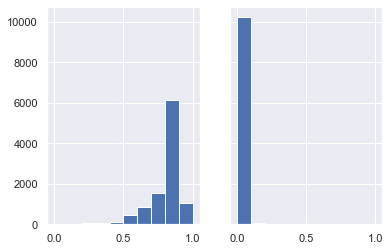

In [251]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
min_max=MinMaxScaler()
df_min_max=pd.DataFrame(min_max.fit_transform(df_new_copy),columns=df_new_copy.columns)
df_min_max.head()
ax1.hist(df_min_max['Rating'])
ax2.hist(df_min_max['Reviews'])

3 Robust Scaler 

This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Median and interquartile range are then stored to be used on later data using the transform method.

X_scaled=(X-X.Median)/IQR

In [232]:
from sklearn.preprocessing import RobustScaler

In [233]:
robust_scaler=RobustScaler()

In [229]:
df_robust_scaler=pd.DataFrame(robust_scaler.fit_transform(df_new_copy),columns=df_new_copy.columns)

In [230]:
df_robust_scaler.head()

Category  Rating   Reviews      Size   Installs  Type  Price  \
0 -0.382878    -0.5 -0.032846  0.424893  -0.090090   0.0    0.0   
1 -0.382878    -1.0 -0.015494  0.210300   0.400400   0.0    0.0   
2 -0.382878     1.0  1.842998 -0.017167   4.904905   0.0    0.0   
3 -0.382878     0.5  4.594647  0.682403  49.949950   0.0    0.0   
4 -0.382878     0.0 -0.015494 -0.270386   0.000000   0.0    0.0   

   Content Rating    Genres     Month       Day  Year  
0             0.0 -1.410377 -2.000000 -0.500000   0.0  
1             0.0 -1.669811 -2.000000 -0.055556   0.0  
2             0.0 -1.410377  0.333333 -0.833333   0.0  
3             3.0 -1.410377 -0.333333 -0.444444   0.0  
4             0.0 -1.646226 -0.333333  0.222222   0.0

In [253]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.hist(df_robust_scaler['Rating'])
ax2.hist(df_robust_scaler['Reviews'])

(array([1.0235e+04, 7.4000e+01, 1.6000e+01, 8.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 2.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([-3.62601670e-02,  1.67806987e+02,  3.35650234e+02,  5.03493481e+02,
         6.71336728e+02,  8.39179975e+02,  1.00702322e+03,  1.17486647e+03,
         1.34270972e+03,  1.51055296e+03,  1.67839621e+03]),
 <BarContainer object of 10 artists>)

# FEATURE TRANSFORMATION

Since data is not normely distributed we need to transoform our data in order to make it normely distributed

In [258]:
df_new_copy.skew()

Category           0.988279
Rating            -2.045010
Reviews           17.458210
Size               1.708109
Installs          10.121269
Type               3.264970
Price             23.311966
Content Rating     1.915700
Genres             0.749750
Month             -0.088901
Day               -0.003352
Year              -2.247338
dtype: float64

QQ plot is used to check data is either normely distribured or not

In [259]:
#Following function will plot normal density plot onr side and qq plot on other side in same plot 
#for QQ plot import stat from skipy library 

In [260]:
from scipy import stats

In [262]:
import pylab

In [261]:
def QQ_plot(df,variable):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[variable],dist='norm',plot=pylab)
    plt.show()

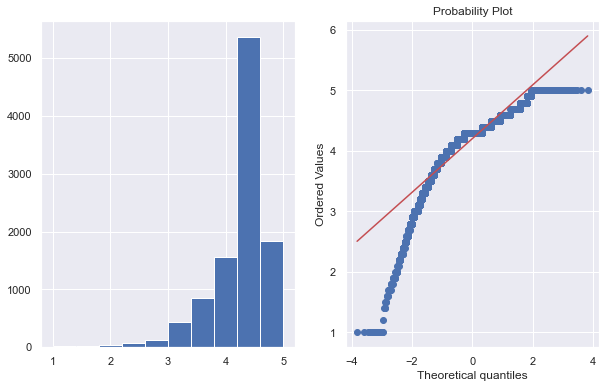

In [263]:
QQ_plot(df_new_copy,'Rating')

In [ ]:
#From above graph (QQplot)it clearly indicate that data is not normely distributed


In [264]:
QQ_plot(df_new_copy,'Reviews')

In [ ]:
#Same Reviews also not normely distributed hence we have to transforme our data in order to make it normely distributed 

# 1. USING LOGARITHMIC TRANSFORMATION

In [265]:
#We will check by using logarithmic transformatio nour darta is get normley transformed or not 

In [266]:
df_new_copy['Rating_new']=np.log(df_new_copy['Rating'])

In [267]:
QQ_plot(df_new_copy,'Rating_new')

In [268]:
#Still our data does not follow straight line hence log normal distrition can't be applied 

In [269]:
df_new_copy.drop('Rating_new',axis=1,inplace=True)

# 2.RECIPROCAL TRANSFORMATION 

Just doing reverse we will check either it follows normal distributio nor not 

In [270]:
df_new_copy['Rating_new']=1/df_new_copy['Rating']

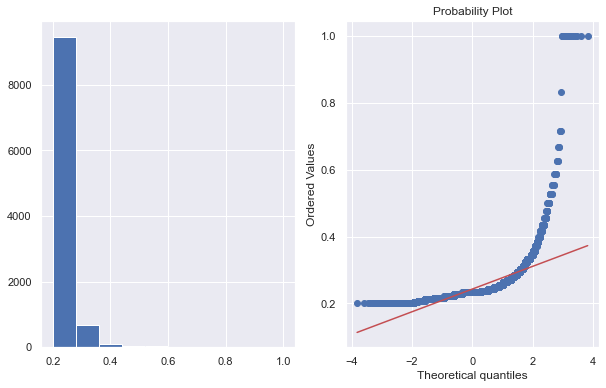

In [271]:
QQ_plot(df_new_copy,'Rating_new')

In [272]:
#This method is also not follows normal distribution

In [273]:
df_new_copy.drop('Rating_new',axis=1,inplace=True)

# 3.SQAURE ROOT TRANSFORMATION

In [275]:
df_new_copy['Rating_new']=df_new_copy['Rating']**(1/2)

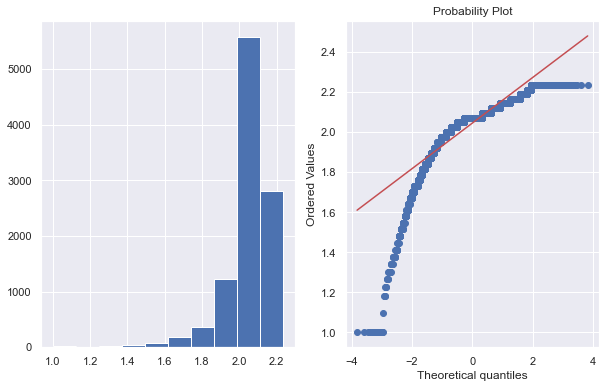

In [276]:
QQ_plot(df_new_copy,'Rating_new')

In [277]:
df_new_copy.drop('Rating_new',axis=1,inplace=True)

# 4.EXPONENTIAL TRANSFORMATION

In [279]:
df_new_copy['Rating_new']=df_new_copy['Rating']**(1/1.2)
QQ_plot(df_new_copy,'Rating_new')